# Zeros of real functions

Unlikely some polynomial functions, that we have some formulas to find the exact roots, it's kind of impossible to know the exact roots of the most part of the existing functions,because there aren't simples methods or formulas available to do it. With that in mind, there was the need to develop numerical methods to find the aproximated roots of any function.

First, let's import some modules to help us.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Bisection method

This method consists in dividing the interval (a,b) by half until it reaches the precision desired to the root:(b-a)<ε

Consider that f(x) is a continuous function in the interval (a,b) and f(a)f(b)<0, which implies that there is at least one root between a and b.



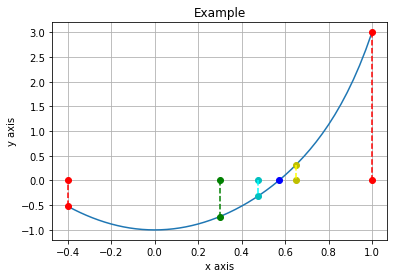

In [27]:
x = np.linspace(-0.4,1)

x1=[1,1]
y1=[3,0]  #Initial interval

x2=[-0.4,-0.4]
y2=[-0.5216384,0] #Initial interval

x3=[0.3,0.3]
y3=[0,-0.7297813] #Interval after 1 iteration

x4=[0.65,0.65]
y4=[0.316522,0] #Interval after 2 iterations

x5=[0.475,0.475]
y5=[0,-0.31766] #Interval after 2 iterations

plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Example")

plt.plot(x,x**7+3*x**2-1)

plt.plot(0.57156841664,0,'bo') #Exact root of the chosen function

plt.plot(1,3,'ro')
plt.plot(-0.4,-0.5216384,'ro')  #Plotting the points of the initial interval
plt.plot(1,0,'ro')                  
plt.plot(-0.4,0,'ro')
plt.plot(x1,y1,'k--', color='red')
plt.plot(x2,y2,'k--', color='red') #Plotting the dotted lines between the points

plt.plot(0.3,0,'go')
plt.plot(0.3,-0.7297813,'go') #Plotting the points after 1 iteration
plt.plot(x3,y3,'k--', color='green') 

plt.plot(0.65,0,'yo')
plt.plot(0.65,0.316522,'yo') #Plotting the points after 2 iterations
plt.plot(x4,y4,'k--', color='yellow') 

plt.plot(0.475,-0.31766,'co')
plt.plot(0.475,0,'co') #Plotting the points after 3 iterations
plt.plot(x5,y5,'k--', color='cyan')

plt.show()


* ### First step: Choose your interval and the precision wanted
    The zero of the given function f(x) is between the interval (-0.4,1), we know that because f(-0.4)f(1)<0!
    Our precision in this case will be ε=0.01 
    
    After decided your precision ε, we'll start the process:



* ### Second step: Check if your interval is already good enough for you
    (b-a)<ε it's a quite simple test.
    If the range of the interval is smaller than the precision choosen, any value of the given interval can be accepted.
    
    As you can notice, this is not our case.



* ### Third step: Split your interval by 2
    x=$\frac{(b+a)}{2}$, for our function and the interval choosen:
    
    x=$\frac{(1+(-0.4))}{2} = 0.3 \to x=0.3$ and f(0.3) are represented by the green points in the graphic
    


* ### Fourth step: Decreasing the interval
    Like it was said before, the whole point of this method is to decrease the interval choosen, but we have to run some tests first.
    Now we'll test if there is a root between (a,x) or (x,b), doind this we'll find the 'real' new interval
    
    If f(a)f(x)<0 -> there is a root of the given function betwwen this interval, so b=x and we have a new interval
    
    If f(x)f(b)<0 -> there is a root of the given function betwwen this interval, so a=x and we have a new interval
    
    In the example f(-0.4)f(x)>0 and f(x)f(1)<0, so the zero of the function f(x) is in the interval (x,1), so the new interval is (0.3,5)
    


* ### Fifth step: Testing the new interval
    Now we have to now if the new interval is 'small' enough according to the precision choosen
    (b-a)<ε if the condition was satisfied, any value of the given interval can be accepted 
    If *not*, go back to the step 3 again!
    
    As you can notice, in our example we must to comeback to the step 3 because the condition was not satisfied
    The blue and the yellow points represents the next 2 iterations.k is number of iterations,if k$\to \infty$ we'll find the exact root of the given function.
    
   

In [47]:
a=input('Enter the start of the interval: ')
b=input('Enter the end of the interval: ')          #Step 1
p=input('Enter the precision that you desire: ')

def f(x):
    return x**7+3*x**2-1

S='Your aproximated root is: '+str((b+a)/2)

if (b-a)<p:  #Step 2
    print S                                        
else:                                               
    k=1 #number of iterations
    M=f(a)
    
    while True:
        x=(a+b)/2   #Step 3
        
        
        if M*f(x)>0:
            a=x
        else:        #Step 4
            b=x                                    
        
        if (b-a)<p:
            x=(a+b)/2  #Step 5
            break
            
        k+=1   
            
print'Your aproximated root is: '+str(x)+' and the number of iterations was: '+str(k)

Enter the start of the interval: -0.4
Enter the end of the interval: 1
Enter the precision that you desire: 0.001
Your aproximated root is: 0.571728515625 and the number of iterations was: 11


# False Position Method

It's almost the same thing than the Bisection method, but with some improvements.

In the last example $f(x)=x^7+3x^2-1$, [a,b]=[-0.4,1] and $f(1)=3> 0 >-0.52=f(-0.4). f(-0.4)$ is closer to zero than f(1), so it's more likely that the root of f(x) is closer to f(-0.4). To use that as an advantage, instead of using the arithmetic average, we'll use weighted average between a and b with the weights |f(a)| and |f(b)|.

$$x = \frac{a|f(b)|+b|f(a)|}{|f(b)|+|f(a)|} = \frac{af(b)-bf(a)}{f(b)-f(a)}$$
Wich implies that x is the point of intersection of a line that contains (a,f(a)) and (b,f(b)) whith the x axis, let me show you that:

The equation of the line is y-yo=m(x-xo), with 'm' being angular coefficient, and using the point (b,f(b)) we have:

$m=\frac{f(b)-f(a)}{b-a} , y-f(b)=m(x-b)$ and y=0 because it's the intersection with de x axis

$-f(b)=\frac{f(b)-f(a)}{b-a}(x-b)\to x = \frac{-f(b)(b-a)}{f(b)-f(a)}+b = \frac{af(b)-bf(a)}{f(b)-f(a)}$ do the math :)

Now, let me show you the process:


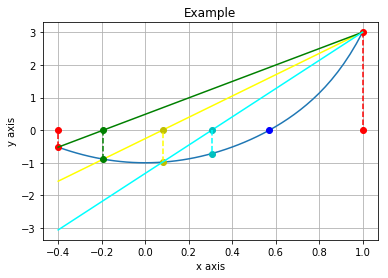

In [35]:
x = np.linspace(-0.4,1)

x1=[1,1] 
y1=[3,0] #Initial interval

x2=[-0.4,-0.4]
y2=[-0.5216384,0] #Initial interval

x3=[-0.192626704661,-0.192626704661]
y3=[0,-0.888694698416] #Interval after 1 iteration

x4=[0.07992774145,0.07992774145]
y4=[-0.980834647601,0] #Interval after 2 iterations

x5=[0.30662360535,0.30662360535]
y5=[0,-0.717691070646] #Interval after 3 iterations

plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Example")

plt.plot(x,x**7+3*x**2-1)

plt.plot(0.57156841664,0,'bo') #The exact root of the function chosen

plt.plot(1,3,'ro')
plt.plot(-0.4,-0.5216384,'ro') #Plotting the points of the initial interval
plt.plot(1,0,'ro')
plt.plot(-0.4,0,'ro')
plt.plot(x1,y1,'k--', color='red') 
plt.plot(x2,y2,'k--', color='red') #Plotting the dotted lines between the points

plt.plot(x,2.515456*x+0.484544,color='green') #Plotting the green line referring to the first iteration
plt.plot(-0.192626704661,0,'go')
plt.plot(-0.192626704661,-0.888694698416,'go') #Plotting the points after 1 iteration
plt.plot(x3,y3,'k--', color='green')

plt.plot(x,3.26061347043*x+-0.260613470433,color='yellow') #Plotting the yellow line referring to the second iteration
plt.plot(0.07992774145,0,'yo')
plt.plot(0.07992774145,-0.980834647601,'yo') #Plotting the points after 2 iterations
plt.plot(x4,y4,'k--', color='yellow')

plt.plot(x,4.32665435851*x+-1.32665435851,color='cyan') #Plotting the yellow line referring to the third iteration
plt.plot(0.30662360535,0,'co')
plt.plot(0.30662360535,-0.717691070646,'co') #Plotting the points after 3 iterations
plt.plot(x5,y5,'k--', color='cyan')




* ### First step: Choose your interval and the precision wanted
    The zero of the given function f(x) is between the interval (-0.4,1), we know that because f(-0.4)f(1)<0!
    
    In this method we'll use 2 kinds of precision, one will be for we know when it's close enough of the exact root by the x axis and the another one will be for we know when the f(the aproximated root) is close enough to the f(the exact root)=0, the closer the value f(x) is to zero, the closer x is to the exact root 
    Our precision in this case will be ε1=ε2=0.01
    
    After decided your precisions ε1 and ε2, we'll start the process:



* ### Second step: Check if your interval is already good enough for you
    (b-a)<ε1 or |f(a)|<ε2 or |f(b)|<ε2 quite simple tests.
    If the range of the interval is smaller than the precision 1 choosen,any value of the given interval can be accepted.
    Now, if the distance of f(b) or f(a) to 0 is smaller than the precision 2 choosen, b or a will be consider the approximated root respectively
    
    As you can notice, this is not our case.



* ### Third step: Split your interval 
    x=$\frac{af(b)-bf(a)}{f(b)-f(a)}$, for our function and the interval choosen:
    
    x=$\frac{((-0.4).3+1.(-0.5216384))}{3-(-0.5216384)} = -0.192626704661 \to x=-0.192626704661$ and f(-0.192626704661) are represented by the green points in the graphic
    


* ### Fourth step: Decreasing the interval
    Like it was said before, the whole point of this method is to decrease the interval choosen, but we have to run some tests first.
    Now we'll test if there is a root between (a,x) or (x,b), doind this we'll find the 'real' new interval
    
    If f(a)f(x)<0 -> there is a root of the given function betwwen this interval, so b=x and we have a new interval
    
    If f(x)f(b)<0 -> there is a root of the given function betwwen this interval, so a=x and we have a new interval
    
    In the example f(-0.4)f(x)>0 and f(x)f(1)<0, so the zero of the function f(x) is in the interval (x,1), so the new interval is (-0.192626704661,5)
    


* ### Fifth step: Testing the new interval
    Now we have to now if the new interval is 'small' enough according to the precision choosen
    (b-a)<ε if the condition was satisfied, any value of the given interval can be accepted 
    
    If *not*, go back to the step 3 again!
    
    As you can notice, in our example we must to comeback to the step 3 because the condition was not satisfied
    The blue and the yellow points represents the next 2 iterations.k is number of iterations,if k$\to \infty$ we'll find the exact root of the given function.

In [46]:
a=input('Enter the start of the interval: ')
b=input('Enter the end of the interval: ')          #Step 1
p1=input('Enter the precision that you desire: ')
p2=input('Enter the precision that you desire for the distance between f(x) and 0: ')

def f(x):
    return x**7+3*x**2-1


if (b-a)<p1:
    x=(b+a)/2
    print 'Your aproximated root is: '+str(x)
    
elif abs(f(a))<p2:
    x=f(a)
    print 'Your aproximated root is: '+str(x)   #Step 2
    
elif abs(f(b))<p2:
    x=f(b)
    print 'Your aproximated root is: '+str(x)
    
    
else:
    k=1
    M=f(a)
    
    while True:
        x=(a*f(b)-b*f(a))/(f(b)-f(a)) #Step 3
        
        if abs(f(x))<p2: #Step 5
            break
        
        else:
            if M*f(x)>0:
                a=x
            else:         #Step 4
                b=x
            
            if (b-a)<p1:
                x=(a+b)/2    #Step 5
                break
            
            k+=1  
                
print'Your aproximated root is: '+str(x)+' and the number of iterations was: '+str(k)

Enter the start of the interval: -0.4
Enter the end of the interval: 1
Enter the precision that you desire: 0.001
Enter the precision that you desire for the distance between f(x) and 0: 0.001
Your aproximated root is: 0.571402282811 and the number of iterations was: 13


# Fixed Point Iteration Method

This method is important because of the concepts that are introduced than in its computational efficiency.

f(x) is a continuous function in the [a,b] interval, that contains a zero of f(x)$\to$ f(x)=0. The FPIM consists in transforming this equation in a equivalent one $x=\phi(x)$, and by an initial guess of the root, generate a sequence that will approach to the exact root $\alpha$

A function $\phi(x)$ that satisfies this condition is called iteration function to f(x)=0

For the equation $x^2-x-6=0$ we have a lot interation functions:

   a)$\phi(x)=x^2-6$

   b)$\phi(x)=\sqrt{x+6}$
   
   c)$\phi(x)=\frac{6}{x}+1$
   
   d)$\phi(x)=\frac{6}{x-1}$
   
   $\vdots$
   


The general form of the iteration function is $\phi(x)=x+A(x)f(x)$ with the condition that in $\alpha$, fixed point of $\phi(x)$, we have $|A(\alpha)|>0$

It's easy to see that $f(\alpha)=0 <=> \phi(\alpha)=\alpha$

Graphically, a root to the equation $x=\phi(x)$ is the interception point of the line $y=x$ and the curve $y=\phi(x)$

From the iteration function we'll generate a sequence of the form $x_{n+1}=\phi(x_{n})$, and depending of the function choosen, when n$\to\infty$ we'll find the exact root.


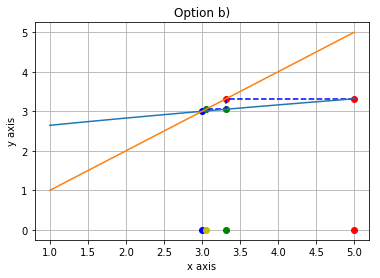

In [50]:
x1=[5,3.316624,3.316624,3.05231]
y1=[3.316624,3.316624,3.05231,3.05231] #Points generated by the iterations
x = np.linspace(1,5)


plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Option b)")

plt.plot(3,0,'bo') #Plotting the exact root
plt.plot(3,3,'bo') 

plt.plot(5,0,'ro') #Plotting the 'guess' of the root
plt.plot(5,3.316624,'ro') 
plt.plot(3.316624,3.316624,'ro') #Plotting the geometric representation of the first iteration in the line y=x

plt.plot(3.316624,3.05231,'go') #Plotting the result of the first iteration
plt.plot(3.316624,0,'go') 
plt.plot(3.05231,3.05231,'go') #Plotting the geometric representation of the second iteration in the line y=x

plt.plot(3.05231,0,'yo')  #Plotting the result of the third iteration

plt.plot(x1,y1,'k--', color='blue')  #Plotting the dotted line between the points


plt.plot(x,(x+6)**0.5) #iteration function chosen in blue
plt.plot(x,x)

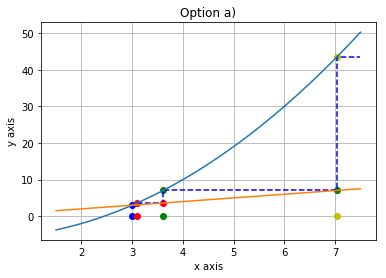

In [20]:
x1=[3.1,3.61,3.61,7.0321,7.0321,7.5]
y1=[3.61,3.61,7.0321,7.0321,43.45043041,43.45043041] #Points generated by the iterations
x = np.linspace(1.5,7.5)

plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Option a)")

plt.plot(3,0,'bo')
plt.plot(3,3,'bo') #Plotting the exact root

plt.plot(3.1,0,'ro') #Plotting the 'guess' of the root
plt.plot(3.1,3.61,'ro')
plt.plot(3.61,3.61,'ro')#Plotting the geometric representation of the first iteration in the line y=x

plt.plot(3.61,7.0321,'go') #Plotting the result of the first iteration
plt.plot(3.61,0,'go')
plt.plot(7.0321,7.0321,'go') #Plotting the geometric representation of the second iteration in the line y=x

plt.plot(7.0321,0,'yo') #Plotting the result of the second iteration
plt.plot(7.0321,43.45043041,'yo') #Plotting the geometric representation of the third iteration in the line y=x

plt.plot(x1,y1,'k--', color='blue') #Plotting the dotted line between the points

plt.plot(x,x**2-6) #iteration function chosen in blue
plt.plot(x,x)

After you choose the proper iteration function (we'll see how to do it in the study of the convergence of this method), you can follow the steps.


* ### First step: Make a guess and choose the precision wanted
    For this method you'll have to 'make a guess' about the root desired, to be the starting point of the sequence that will approach the exact root.In the first example x0=5 and in the second x0=3.1
    
    In this method we'll use 2 kinds of precision, one will be for we know when 2 terms generated by the iteration function are close enough to each other and the another one will be for we know when the f(the aproximated root) is close enough to the f(the exact root)=0, the closer the value f(x) is to zero, the closer x is to the exact root .
    Our precision in this case will be ε1=ε2=0.001
    
    After decided your precisions ε1 and ε2, we'll start the process:
    
* ### Second step: Check if your estimate for the root is already good enough
    |f(a)|<ε2 or |f(b)|<ε2 quite simple tests.
    
    If the distance of f(b) or f(a) to 0 is smaller than the precision 2 choosen, b or a will be consider the approximated root respectively
    
    As you can notice, this is not our case.
    
* ### Third step: Using the iteration function
    The sequence generated by the iteration function works for us 'walk' on the function itself until we reach the interception point to the line y=x, that will give us the root for the function chosen. But how?
    
    Obs: It's very important to follow the graphic of the first example('option b)')!!!
    
    Remember the sequence,  $x_{n+1}=\phi(x_{n})$
    
    In the example x0=5 and $\phi(5)=3.316624$, after that we'll find a point in the line y=x that will have the same value of $\phi(5)$.If you check it out, the x coordinate of the point ($\phi(5)$,$\phi(5)$)$\to$(in the line y=x) is closer to the fix point in the iteration function than the x coordinate of the initial point choosen, wich is (5,$\phi(5)$).
    You just realize that the output of the iteration function are values of x that are closer to the exact root than the values of x that were the input of the same function, generating a sequence :)
    
    The $x_{0}$ is represented in both examples by the red color, and the another iterations are represented by the colors green and yellow respectively
    
* ### Fourth step: Testing the new aproximated root
    The more iterations made, the smaller are the gaps between two aproximated roots generated by the sequence.To take advantage of that, we'll use that, if two 'zeros' are closer each other than a certain chosen precision, the last term of the sequence will be our final aproximation.
    
    The test for that is ($x_{n+1}-x_{n})$<ε1 and the test used in the Step 2.
    
    If the test was *not* succeeded, go back to the step 3 again!
    
    
    
    
    

In [44]:
x0=input('Enter the value of x0: ')
p1=input('Enter the precision that you desire: ')  #Step 1
p2=input('Enter the precision that you desire for the distance between f(x) and 0: ')


def f(x):
    return x**2-x-6

def phi(x):
    return (x+6)**0.5

if abs(f(x0))<p1:
    xap=x0        #Step 2
    print 'Your aproximated root is: '+str(xap)  
k=1

while True:

    x1=phi(x0)  #Step 3
    
    
    if abs(f(x1))<p1 or abs(x1-x0)<p2: #Step 4
        xap=x1
        break
    
    x0=x1
    k=k+1
print'Your aproximated root is: '+str(xap)+' and the number of iterations was: '+str(k) 

Enter the value of x0: 5
Enter the precision that you desire: 0.001
Enter the precision that you desire for the distance between f(x) and 0: 0.001
Your aproximated root is: 3.00004029612 and the number of iterations was: 6


There are infinite iteration functions $\phi(x)$ for the equation $f(x)=0$, and as you can realize, the second example don't converges to the exact root, but why?

## Convergence of the MPIF

$\alpha$ is a root of the equation f(x)=0, in the interval *I* centered in itself. $\phi(x)$ is an iteration function for the equation f(x)=0

If,

* $\phi(x)$ and $\phi'(x)$ are continuous in *I*

* $|\phi'(x)|<1$ for any x $\in$ *I*

* $x_{0}\in$ *I*

The sequence generated by $x_{n+1}=\phi(x_{n})$ will converge to the value of $\alpha$

# Newton-Raphson Method

In the MPIF we saw that one of the conditions of convergence is $|\phi'(x)|<1$ for any x $\in$ *I*, and the convergence of the method will be faster the smaller is $|\phi'(\alpha)|$.

The Newthon-Raphson method to improve the efficiency of MPIF uses $\phi'(\alpha)=0$, let's see the consequences of it:

The general form of the iteration function is $\phi(x)=x+A(x)f(x)$, so $\phi'(x)=1+A'(x)f(x)+A(x)f'(x)$

$$\phi'(\alpha)=1+A'(\alpha)f(\alpha)+A(\alpha)f'(\alpha) ,  f(\alpha)=0,\phi'(\alpha)=0$$

$$0=1+A(\alpha)f'(\alpha) \to  A(\alpha)=\frac{-1}{f'(\alpha)}  \to  A(x)=\frac{-1}{f'(x)}$$

$\phi(x)=x-\frac{f(x)}{f'(x)}$, after $x_{0}$ was chosen the sequence wil be generated by $x_{k+1}=x_{k}-\frac{f(x_{k})}{f'(x_{k})}$



[-0.4, 1, -4, 4]

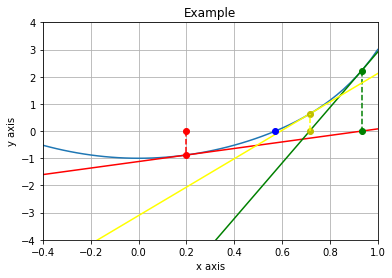

In [29]:
x = np.linspace(-0.4,1)

x1=[0.2,0.2]
y1=[0,-0.8799872] #Initial guess of the root

x2=[0.933048995042,0.933048995042]
y2=[2.22738740055,0] #Approximated root after the first iteration

x3=[0.715042029852,0.715042029852]
y3=[0,0.629425182497] #Approximated root after the second iterations

plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Example")

plt.plot(x,x**7+3*x**2-1) #function chosen

plt.plot(0.2,0,'ro')
plt.plot(0.2,-0.8799872,'ro') #Plotting the guess of the root
plt.plot(x1,y1,'k--', color='red') #Plotting the line between the points
plt.plot(x,1.200448*x-1.1200768,color='red') #Plotting the red line referring to the first iteration

plt.plot(0.933048995042,0,'go')
plt.plot(0.933048995042,2.22738740055,'go') #Plotting the result of the first iteration
plt.plot(x2,y2,'k--', color='green') 
plt.plot(x,10.2170469582*x-7.30561799609, color='green') #Plotting the green line referring to the second iteration

plt.plot(0.715042029852,0,'yo')
plt.plot(0.715042029852,0.629425182497,'yo')#Plotting the result of the first iteration
plt.plot(x3,y3,'k--', color='yellow')
plt.plot(x,5.22584625051*x-3.10727452816,color='yellow')#Plotting the yellow line referring to the third iteration

plt.plot(0.57156841664,0,'bo') #Exact root of the function chosen

plt.axis([-0.4,1,-4, 4])

* ### First step: Make a guess and choose the precision wanted
    For this method you'll have to 'make a guess' about the root desired, to be the starting point of the sequence that will approach the exact root.In our example $x_{0}=0.2$
    
    In this method we'll use 2 kinds of precision, one will be for we know when 2 terms generated by the iteration function are close enough to each other and the another one will be for we know when the f(the aproximated root) is close enough to the f(the exact root)=0, the closer the value f(x) is to zero, the closer x is to the exact root .
    Our precision in this case will be ε1=ε2=0.001
    
    After decided your precisions ε1 and ε2, we'll start the process:
    
* ### Second step: Check if your estimate for the root is already good enough
    |f(a)|<ε2 or |f(b)|<ε2 quite simple tests.
    
    If the distance of f(b) or f(a) to 0 is smaller than the precision 2 choosen, b or a will be consider the approximated root respectively
    
    As you can notice, this is not our case.
    
* ### Third step: Using the iteration function
    The sequence generated by the iteration function works for us 'walk' on the function itself until we reach the closest value possible of the exact root for the function chosen. But how?
        
     Obs:It's very important that you have read and understood about the Fixed Point Iteration Method.
     
     The output of the iteration function are values of x that are closer to the exact root than the values of x that were the input of the same function, generating a sequence :)
     
     Remember the sequence generated by this method$\to x_{k+1}=x_{k}-\frac{f(x_{k})}{f'(x_{k})}$ 
     
     The $x_{0}$ is represented in the example by the red color, and the another iterations are represented by the colors green and yellow respectively.
     
* ### Fourth step: Testing the new aproximated root
    The more iterations made, the smaller are the gaps between two aproximated roots generated by the sequence.To take advantage of that, we'll use that, if two 'zeros' are closer each other than a certain chosen precision, the last term of the sequence will be our final aproximation.
    
    The test for that is ($x_{n+1}-x_{n})<$ε1 and the test used in the Step 2.
    
    If the test was *not* succeeded, go back to the step 3 again!
     

In [43]:
x0=input('Enter the value of x0: ')
p1=input('Enter the precision that you desire: ')  #Step 1
p2=input('Enter the precision that you desire for the distance between f(x) and 0: ')


def f(x):
    return x**7+3*x**2-1
def fd(x):
    return 7*x**6+6*x

if abs(f(x0))<p1:
    xap=x0            #Step 2
    print'Your aproximated root is: '+str(xap)
k=1
while True:
    
    x1=x0-f(x0)/fd(x0) #Step 3
        
    if abs(f(x1))<p1 or abs(x1-x0)<p2:
        xap=x1        #Step 4
        break   
    
    x0=x1
    k+=1
print'Your aproximated root is: '+str(xap)+' and the number of iterations was: '+str(k)     


Enter the value of x0: 0.2
Enter the precision that you desire: 0.001
Enter the precision that you desire for the distance between f(x) and 0: 0.001
Your aproximated root is: 0.571568851 and the number of iterations was: 5


# Secant Method



A great disadvantage for Newton's method is to obtain f'(x) ans its value in each iteration. To work around this issue, the secant method uses $f'(x)\approx\frac{f(x_{k})-f(x_{k-1})}{x_{k}-x_{k-1}}$, replacing in the sequence generated by Newton's method:

Remember the sequence generated by Newton's method is $\to x_{k+1}=x_{k}-\frac{f(x_{k})}{f'(x_{k})}$ 

$x_{k+1}=x_{k}-\frac{f(x_{k})}{\frac{f(x_{k})-f(x_{k-1})}{x_{k}-x_{k-1}}}\to x_{k+1}=x_{k}-\frac{f(x_{k})}{f(x_{k})-f(x_{k-1})}.(x_{k}-x_{k-1})$ 

Or $\phi(x_{k})=\frac{x_{k-1}f(x_{k})-x_{k}f(x_{k-1})}{f(x_{k})-f(x_{k-1})}$ if you notice, the Secant method is pretty much the same thing as the False Position Method, but with a different approach.

We realize that 2 aproximations for the root are needed.



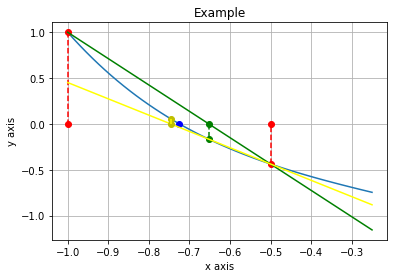

In [6]:
x = np.linspace(-1,-0.25)

x1=[-1,-1] 
y1=[1,0] #Initial guess

x2=[-0.5,-0.5]
y2=[-0.4375,0] #Initial guess

x3=[-0.652173913043,-0.652173913043]
y3=[0,-0.166919786594] #Aproximated root after 1 iteration

x4=[-0.746049354896,-0.746049354896]
y4=[0.0558413821854,0] #Aproximated root after 2 iterations

plt.grid(True)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Example")

plt.plot(x,x**4-x-1)

plt.plot(-0.724491959001,0,'bo') #The exact root of the function chosen

plt.plot(-1,1,'ro')
plt.plot(-0.5,-0.4375,'ro') #Plotting the points of the initial guess
plt.plot(-1,0,'ro')
plt.plot(-0.5,0,'ro')
plt.plot(x1,y1,'k--', color='red') 
plt.plot(x2,y2,'k--', color='red') #Plotting the dotted lines between the points

plt.plot(x,-2.875*x-1.875,color='green') #Plotting the green line referring to the first iteration
plt.plot(-0.652173913043,0,'go')
plt.plot(-0.652173913043,-0.166919786594,'go') #Plotting the points after 1 iteration
plt.plot(x3,y3,'k--', color='green')

plt.plot(x,-1.77809854524*x-1.32654927262,color='yellow') #Plotting the yellow line referring to the second iteration
plt.plot(-0.746049354896,0,'yo')
plt.plot(-0.746049354896,0.0558413821854,'yo') #Plotting the points after 2 iterations
plt.plot(x4,y4,'k--', color='yellow')


* ### First step: Make 2 guesses and choose the precision wanted
    For this method you'll have to 'make a guess' about the root desired twice, we'll use this values to be the starting point of the sequence that will approach the exact root.In our example $x_{0}=-0.4$ and $x_{1}=1$
    
       
    In this method we'll use 2 kinds of precision, one will be for we know when 2 terms generated by the iteration function are close enough to each other and the another one will be for we know when the f(the aproximated root) is close enough to the f(the exact root)=0, the closer the value f(x) is to zero, the closer x is to the exact root .
    Our precision in this case will be ε1=ε2=0.001
    
    After decided your precisions ε1 and ε2, we'll start the process:
    
* ### Second step: Check if your estimate for the root is already good enough
    |f(a)|<ε2 or |f(b)|<ε2 quite simple tests.
    
    If the distance of f(b) or f(a) to 0 is smaller than the precision 2 choosen, b or a will be consider the approximated root respectively
    
    As you can notice, this is not our case.
    
* ### Third step: Using the iteration function
    The sequence generated by the iteration function works for us 'walk' on the function itself until we reach the closest value possible of the exact root for the function chosen. But how?
    
     Obs:It's very important that you have read and understood about the Fixed Point Iteration Method.
     
     The output of the iteration function are values of x that are closer to the exact root than the values of x that were the input of the same function, generating a sequence :)
     
     Remember the sequence generated by this method$\to x_{k+1}=x_{k}-\frac{f(x_{k})}{f(x_{k})-f(x_{k-1})}.(x_{k}-x_{k-1})$  
     
     The $x_{0}$ and $x_{1}$ are represented in the example by the red color, and the another iterations are represented by the colors green,yellow and cyan respectively. 
     
* ### Fourth step: Testing the new aproximated root
    The more iterations made, the smaller are the gaps between two aproximated roots generated by the sequence.To take advantage of that, we'll use that, if two 'zeros' are closer each other than a certain chosen precision, the last term of the sequence will be our final aproximation.
    
    The test for that is ($x_{n+1}-x_{n})<$ε1 and the test used in the Step 2.
    
    If the test was *not* succeeded, go back to the step 3 again!

In [7]:
x0=input('Enter the value of x0: ')  
x1=input('Enter the value of x1: ')   #Step 1
p2=input('Enter the precision that you desire: ')
p1=input('Enter the precision that you desire for the distance between f(x) and 0: ')


def f(x):
    return x**4-x-1

if abs(f(x0))<p1:
    xap=x0
    print 'Your aproximated root is: '+str(xap)
                                                #Step 2
elif abs(f(x1))<p1 or abs(x1-x0)<p2:
    xap=x1
    
k=1    
while True:
    x2=x1-((f(x1)*(x1-x0))/(f(x1)-f(x0)))  #Step 3  
    
    if abs(f(x2))<p1 or abs(x1-x0)<p2:
        xap=x2                          #Step 4
        break
      
    x0=x1
    x1=x2
    k+=1
    
print'Your aproximated root is: '+str(xap)+' and the number of iterations was: '+str(k) 

Enter the value of x0: -1
Enter the value of x1: -0.5
Enter the precision that you desire: 0.001
Enter the precision that you desire for the distance between f(x) and 0: 0.001
Your aproximated root is: -0.724439123139 and the number of iterations was: 4
